# Практическая работа №5

## КМБО-06-22, Масленников Иван
## Тема №19 "Данные о бронировании отелей"

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Считываем данные файла:

In [2]:
df = pd.read_csv('C:\\Users\\Иван\\Desktop\\уник\\R\\hotel_bookings.csv')

Выведем основную информацию по таблице:

In [3]:
# получение информации о типах данных и количестве непустых значений для каждого признака
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1. Сколько в датасете объектов и признаков? Дать описание каждому признаку, если оно есть.

### В выбранном наборе 119390 объектов и 32 признака.

 1)  hotel (H1 = Курортный отель или H2 = Городской отель)                                                             object 
 
 2)  is_canceled (Значение, указывающее, было ли отменено бронирование (1) или нет (0))                                int64  
 
 3)  lead_time (Количество дней, прошедших между датой внесения бронирования в PMS и датой прибытия)                   int64  
 
 4)  arrival_date_year (Год прибытия)                                                                                  int64  
 
 5)  arrival_date_month (Месяц прибытия)                                                                               object 
 
 6)  arrival_date_week_number (Номер недели в году для даты прибытия)                                                  int64  
 
 7)  arrival_date_day_of_month (День прибытия)                                                                         int64  
 
 8)  stays_in_weekend_nights (Количество ночей на выходных, в которые гость останавливался или бронировал номер отеля) int64  
 
 9)  stays_in_week_nights (Количество ночей в неделю, в которые гость останавливался или бронировал номер в отеле)     int64  
 
 10)  adults (Количество взрослых)                                                                                      int64  
 
 11) children (Количество детей)                                                                                       float64   
 
 12) babies (Количество малышей)                                                                                       int64  
 
 13) meal (Тип забронированного питания. Категории представлены в стандартных пакетах гостиничного питания: Undefined/SC – без пакета питания; BB – Кровать и завтрак; HB – полупансион (завтрак и еще один прием пищи – обычно ужин); FB – Полный пансион (завтрак, обед и ужин))                                                                                                object
 
 14) country (Страна происхождения. Категории представлены в формате ISO 3155-3:2013)                                  object
 
 15) market_segment (Обозначение сегмента рынка. В категориях термин “TA” означает “Туристические агенты”, а “TO” означает “Туроператоры”.)                                                                                                       object 
 
 16) distribution_channel (Канал распространения бронирования. Термин “TA” означает “Туристические агенты”, а “TO” означает “Туроператоры”.)                                                                                                       object 
 
 17) is_repeated_guest (Значение, указывающее, было ли имя при бронировании от повторного гостя (1) или нет (0))       int64     
 
 18) previous_cancellations (Кол. предыдущих бронирований, которые были отменены клиентом до текущего бронирования)    int64
 
 19) previous_bookings_not_canceled (Кол. предыдущих бронирований, не отмененных клиентом до текущего бронирования)    int64
 
 20) reserved_room_type (Код забронированного типа номера. Код представлен вместо обозначения в целях анонимности.)    object
 
 21) assigned_room_type (Код для типа номера, указанного при бронировании. Иногда назначенный тип номера отличается от забронированного по причинам работы отеля (например, овербукинг) или по запросу клиента. Код представлен вместо обозначения по соображениям анонимности.)                                                                                             object 
 
 22) booking_changes (Кол. изменений, внесенных в бронирование с момента ввода в PMS до регистрации заезда или отмены) int64
 
 23) deposit_type (Указание на то, внес ли клиент депозит для гарантии бронирования. Эта переменная может принимать три категории: Без депозита – депозит не был внесен; Невозвратный – депозит был внесен в размере общей стоимости проживания; Подлежащий возврату – депозит был внесен на сумму, меньшую общей стоимости проживания.)                                object
 
 24) agent (Идентификационный номер туристического агентства, оформившего бронирование)                                float64
 
 25) company (Идентификационный номер компании/юридического лица, оформившего бронирование или ответственного за оплату бронирования. Идентификатор указывается вместо обозначения по соображениям анонимности)                                float64
 
 26) days_in_waiting_list (Кол. дней, в которыt бронирование было в списке ожидания, прежде чем оно было подтверждено) int64
 
 27) customer_type (Тип бронирования, предполагающий одну из четырех категорий: Контрактный - когда с бронированием связано выделение или другой тип контракта; Групповой – когда бронирование связано с группой; Временный – когда бронирование не является частью группы или контракта и не связано с другим временным бронированием; Временная сторона - когда бронирование является временным, но связано, по крайней мере, с другим временным бронированием)                                              object
 
 28) adr (Средняя суточная ставка, полученная путем деления суммы всех сделок по размещению на общее количество ночей проживания)                                                                                                            float64
 
 29) required_car_parking_spaces (Количество парковочных мест, требуемое заказчиком)                                   int64
 
 30) total_of_special_requests (Кол. особых запросов заказчика (например, двуспальная кровать или высокий этаж))       int64
 
 31) reservation_status (Статус последнего бронирования, предполагающий одну из трех категорий: Отменено – бронирование было отменено клиентом; Выезд - клиент зарегистрировался, но уже отбыл; Незаезд – клиент не зарегистрировался и не сообщил отелю о причине)                                                                                                               object 
 
 32) reservation_status_date (Дата, на которую был установлен последний статус. Эту переменную можно использовать в сочетании со статусом бронирования, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля)             object

## 2. Сколько в датасете категориальных признаков, какие именно?

In [4]:
# отбор категориальных признаков
cat_columns = df.select_dtypes(['object']).columns
num_cat_columns = len(cat_columns)

#Вывод категориальных признаков
print("Количество категориальных признаков в датасете: ", num_cat_columns)
print("Список категориальных признаков: ", list(cat_columns))

Количество категориальных признаков в датасете:  12
Список категориальных признаков:  ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


Из 32 признаков, перечисленных выше, категориальными являются:
1) hotel - тип отеля (City Hotel или Resort Hotel)

2) arrival_date_month - месяц прибытия гостя

3) meal - тип питания, предоставляемый в отеле

4) country - страна происхождения гостя

5) market_segment - рыночный сегмент, в котором было сделано бронирование

6) distribution_channel - канал распространения, через который было сделано бронирование

7) is_repeated_guest - бинарный признак, указывающий, является ли гость повторным (1) или нет (0)

8) reserved_room_type - тип забронированного номера

9) assigned_room_type - тип номера, который был назначен при заселении гостя (может отличаться от забронированного)

10) deposit_type - тип депозита, который был внесен для гарантирования бронирования

11) customer_type - тип клиента (индивидуальный или групповой)

12) reservation_status - текущий статус бронирования (забронирован, изменен или отменен)

Итого 12 категориальных признаков

## 3. Столбец с макимальным количеством уникальных значений категориального признака?

In [5]:
# Сосздаем пустой словарь
unique_counts = {}

for col in df.columns:
    # Если тип столбца является object (категориальный), то подсчитать количество уникальных значений
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        # Количество уникальных значений в словарь
        unique_counts[col] = unique_values

# Столбец с максимальным количеством уникальных значений категориального признака
max_column = max(unique_counts, key=unique_counts.get)

print("Столбец с максимальным количеством уникальных значений категориального признака: ", max_column)
print("Количество уникальных значений: ", unique_values)

Столбец с максимальным количеством уникальных значений категориального признака:  reservation_status_date
Количество уникальных значений:  926


Из данных приведённых в пункте 1 и результатов работы функции nunique() видно, максимальное количество уникальных значений = 926 для стобца "reservation_status_date"

## 4. Есть ли бинарные признаки?

In [6]:
i = 1
print("Переменные имеющие бинарные признаки: ")

# Перебор признаков у котопрых макимум 2 значения
for col in df.columns:
    if df[col].nunique() == 2:
        print(i, col)
        i += 1
        
print("Количество переменных имеющих бинарные признаки: ", i-1)

Переменные имеющие бинарные признаки: 
1 hotel
2 is_canceled
3 is_repeated_guest
Количество переменных имеющих бинарные признаки:  3


Из данных приведённых в пункте 1 и результатов работы функции, выполненной в блоке выше, видно, что бинарными являются 3 признака: hotel, is_canceled, is_repeated_guest

## 5. Какие числовые признаки?

In [7]:
# выбор только числовых признаков
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# вывод списка числовых признаков
print(numeric_cols)
# вывод количества числовых признаков
print("Количество числовых признаков: ",len(numeric_cols))

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Количество числовых признаков:  20


Из данных приведённых в пункте 1 и результатов работы функции, выполненной в блоке выше, видно, что чисто числовыми являются 20 признаков: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'].

## 6. Есть ли пропуски?

In [8]:
# Создание объекта а с вычислением суммы уникальных объектов
a = df.isnull().sum()
print(a)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Из результата работы функции isnull().sum(), в датасете имеются пропуски в некоторых признаках.

## 7. Сколько объектов с пропусками?

In [9]:
# Вычисление количества объектов у которых имеется больше 0 пропусков
num_cols_with_missing_values = df.isnull().any().sum()
print("Количество стобцов с пропущенными переменными: ",num_cols_with_missing_values)

Количество стобцов с пропущенными переменными:  4


Из результата работы функции в 6 пункте и результата работы блока кода выше, в датасете имеются пропуски в 4 признаках: children, country, agent, company.

## 8. Столбец с максимальным количеством пропусков?

In [10]:
# Создание объекта а с вычислением суммы уникальных объектов
a = df.isnull().sum()
# Нахождение признака с максимальным количеством пропусков
max_col_name = a.idxmax()
print(a)
print("Маскимальное число пропусков в стобце: ", max_col_name, max(a))

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Из результата работы блока кода представленного выше, можно сделать вывод, что столбцом с максимальным числом пропусков это company с количество пропусков равным 112593.

## 9. Есть ли на ваш взгляд выбросы, аномальные значения?

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Из графиков можно увидеть, что некоторые переменные имеют выбросы, например, переменные lead_time, adr, previous_cancellations, days_in_waiting_list, stays_in_weekend_nights, stays_in_week_nights.

## 10. Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение?

In [12]:
numeric_cols = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# создание матрицы признаков
X = df[numeric_cols]

# создание объекта StandardScaler
scaler = StandardScaler()

# стандартизация признаков
X_scaled = scaler.fit_transform(X)

# создание датафрейма с нормированными признаками
df_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

# выбор столбца с максимальным средним значением
max_mean_col = df_scaled.mean().idxmax()

# вывод столбца с максимальным средним значением
print("Cтолбец с максимальным средним значением: ",max_mean_col)

# вывод таблицы после нормировки признаков через стандартное отклонение
df_scaled.describe()

Cтолбец с максимальным средним значением:  adr


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193860e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.030500e+05,6.797000e+03,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-5.713385e-17,6.094277e-17,-8.406294e-14,-1.295034e-16,2.475800e-17,1.197430e-16,-2.761469e-17,3.237585e-17,1.714073e-17,2.047296e-17,9.522308e-18,-3.142362e-17,2.047296e-17,3.428031e-17,5.295457e-17,3.240669e-17,3.904146e-17,2.513889e-16,-5.713385e-18,-5.332493e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000005e+00,1.000074e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-7.670405e-01,-9.733187e-01,-1.634768e+00,-1.923191e+00,-1.685297e+00,-9.288904e-01,-1.310240e+00,-3.204792e+00,-2.606633e-01,-8.157926e-02,-1.815604e-01,-1.031795e-01,-9.155477e-02,-3.389899e-01,-7.735874e-01,-1.392125e+00,-1.319236e-01,-2.141286e+00,-2.548729e-01,-7.206941e-01
25%,-7.670405e-01,-8.048782e-01,-2.212864e-01,-8.206620e-01,-8.881022e-01,-9.288904e-01,-7.862072e-01,2.478973e-01,-2.606633e-01,-8.157926e-02,-1.815604e-01,-1.031795e-01,-9.155477e-02,-3.389899e-01,-7.013683e-01,-9.667395e-01,-1.319236e-01,-6.439250e-01,-2.548729e-01,-7.206941e-01
50%,-7.670405e-01,-3.276301e-01,-2.212864e-01,6.136141e-02,2.297730e-02,7.250220e-02,-2.621744e-01,2.478973e-01,-2.606633e-01,-8.157926e-02,-1.815604e-01,-1.031795e-01,-9.155477e-02,-3.389899e-01,-6.562314e-01,-7.798784e-02,-1.319236e-01,-1.435844e-01,-2.548729e-01,-7.206941e-01
75%,1.303712e+00,5.239303e-01,1.192195e+00,7.963809e-01,8.201718e-01,1.073895e+00,2.618584e-01,2.478973e-01,-2.606633e-01,-8.157926e-02,-1.815604e-01,-1.031795e-01,-9.155477e-02,-3.389899e-01,1.284657e+00,6.132634e-01,-1.319236e-01,4.782547e-01,-2.548729e-01,5.406659e-01
max,1.303712e+00,5.923385e+00,1.192195e+00,1.898910e+00,1.731251e+00,1.809757e+01,2.489140e+01,9.174417e+01,2.482968e+01,1.025501e+02,5.507809e+00,3.069036e+01,4.799081e+01,3.185465e+01,4.047038e+00,2.687017e+00,2.209074e+01,1.048404e+02,3.235957e+01,5.586106e+00


Из данных работы функции, выполненной в блоке выше, видим, что столбец с максимальным средним значением после нормировки признаков - adr.

## 11. Столбец с целевым признаком?

Поскольку мы собираемся делать прогноз отмены брони. В качестве целевого признака будет выбран - booking_changes

## 12. Сколько объектов попадает в тренировочную выборку при использовании train_test_split с параметрами test_size = 0.3, random_state = 42?

In [13]:
# Исключим столбец с целевым признаком из датасета для тренировки
training = df.drop('booking_changes', axis=1)
test = df['booking_changes']

# Разделим данные на тренировочные и проверочные
x_train, x_test, y_train, y_test = train_test_split(training, test, test_size=0.3, random_state=42)

print("Тренировчная выборка: ", x_train.shape, "Тестовая выборка: ", x_test.shape)



Тренировчная выборка:  (83573, 31) Тестовая выборка:  (35817, 31)


Судя по размерам таблицы, в тренировочную выборку пойдет 83573 объектов, а в тестовую 35817.

## 13. Между какими признаками наблюдается линейная зависимость (корреляция)?

In [14]:
# Для выявления мультиколлениарности признаков, будем использовать VIF 
numeric_cols = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

df = df.dropna()
# создание матрицы признаков
X = df[numeric_cols]

# добавление константы к матрице признаков
X = sm.add_constant(X)

# определение VIF для каждого признака
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

# вывод результатов
print(vif)

const                             4.493740e+07
is_canceled                       1.067961e+00
lead_time                         2.145151e+00
arrival_date_year                 5.704551e+00
arrival_date_week_number          4.459099e+00
arrival_date_day_of_month         1.576790e+00
stays_in_weekend_nights           4.750043e+00
stays_in_week_nights              5.837130e+00
adults                            1.450299e+00
children                          1.566940e+00
babies                                     NaN
is_repeated_guest                 2.732676e+00
previous_cancellations            1.227147e+00
previous_bookings_not_canceled    2.982947e+00
booking_changes                   1.619719e+00
agent                             2.317488e+00
company                           1.752223e+00
days_in_waiting_list                       NaN
adr                               2.768751e+00
required_car_parking_spaces       1.054014e+00
total_of_special_requests         1.688677e+00
dtype: float6

C:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


На основе данных полученых выше ожно сделать вывод: однозначная корреляция наблюдается между признаками у которых vif > 4, то есть у признаков arrival_date_year, arrival_date_week_number, stays_in_weekend_nights, stays_in_week_nights.

## 14. Сколько признаков достаточно для объяснения 90% дисперсии после применения метода PCA?

In [15]:
# отбор только числовых признаков
numeric_cols = x_train.select_dtypes(include='number').columns.tolist()

# стандартизация числовых признаков
stand_X = pd.DataFrame(preprocessing.scale(x_train[numeric_cols]), columns=numeric_cols)
stand_X = stand_X.dropna()

# PCA
pca = PCA(0.90) # 90% дисперсии
pca.fit(stand_X)
print("Количество компонентов достаточных для объяснения 90% дисперсии: ", pca.n_components_)
print("Суммарная доля объясненной дисперсии для модели PCA: " ,sum(pca.explained_variance_ratio_))

Количество компонентов достаточных для объяснения 90% дисперсии:  8
Суммарная доля объясненной дисперсии для модели PCA:  0.9006748788508198


## 15. Какой признак вносит наибольший вклад в первую компоненту?

In [16]:
pca = PCA(n_components=8)
x = pca.fit(stand_X)
first_component = pca.components_[0]
greatest_contribution_i = 0
greatest_contribution = first_component[greatest_contribution_i]

for i in range(0, len(first_component)):
    if  abs(first_component[i]) >  abs(greatest_contribution):
        greatest_contribution = first_component[i]
        greatest_contribution_i = i
print("Наибольший вклад вносит: " ,greatest_contribution_i, greatest_contribution)

Наибольший вклад вносит:  6 0.7316437151296429


Наибольший вклад в первую компоненту вносит 6 признак.

In [17]:
stand_X.iloc[:, 6]

106      0.260446
363      3.916275
1697    -0.784076
2353     1.304969
4181     1.827230
           ...   
80591   -1.306337
80885    0.782708
81597    3.916275
81718    1.304969
83047    0.260446
Name: stays_in_week_nights, Length: 156, dtype: float64

Видим, что это stays_in_week_nights

## 16. Построить двухмерное представление данных с помощью алгоритма t-SNE. На сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить смысл кластеров.

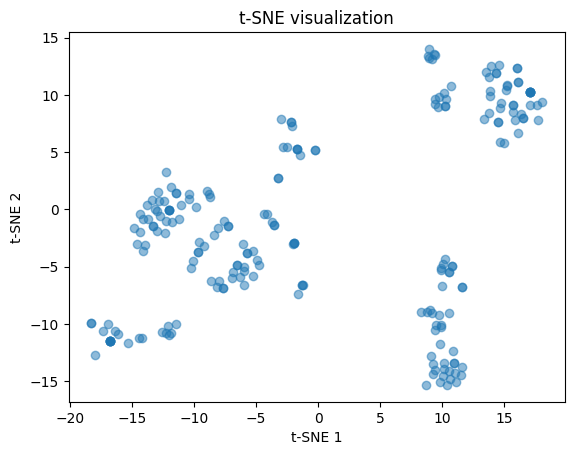

In [18]:
# выбор признаков для анализа
numeric_cols = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# применение алгоритма t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df[numeric_cols])

# создание графика
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.5)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE visualization')
plt.show()

Визуально выборка разделяется от 4 до 8 кластеров, однако чёткого разделения не видно.

Каждый кластер точек, т.е. группа точек, близких друг к другу на графике, указывает на определенный тип бронирования. Таким образом, можно использовать кластерный анализ для выделения схожих групп объектов и анализа их характеристик.